# Capstone Project

### Jiewei Chen

April 2017

***
## Exploratory Data Analysis + Prediction Part 

### 90000 games! 32 features! Up to 100 text comments for each game!

***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import LeaveOneOut
from sklearn import linear_model, neighbors

In [2]:
bgg=pd.read_csv('bgg_games.csv')

In [3]:
bgg.shape

(31331, 31)

In [4]:
bgg.columns

Index(['snapshot_date', 'id', 'name', 'year', 'artists', 'categories',
       'designers', 'expansion', 'expands', 'expansions', 'families',
       'implementations', 'max_players', 'mechanics', 'min_age', 'min_players',
       'playing_time', 'publishers', 'ranks', 'rating_average',
       'rating_average_weight', 'rating_bayes_average', 'rating_median',
       'rating_num_weights', 'rating_stddev', 'users_commented', 'users_owned',
       'users_rated', 'users_trading', 'users_wanting', 'users_wishing'],
      dtype='object')

## Featured Findings 1 - 
### 50% of the games invented in the recent 20 years, a boom of board game is found in 2002-2005

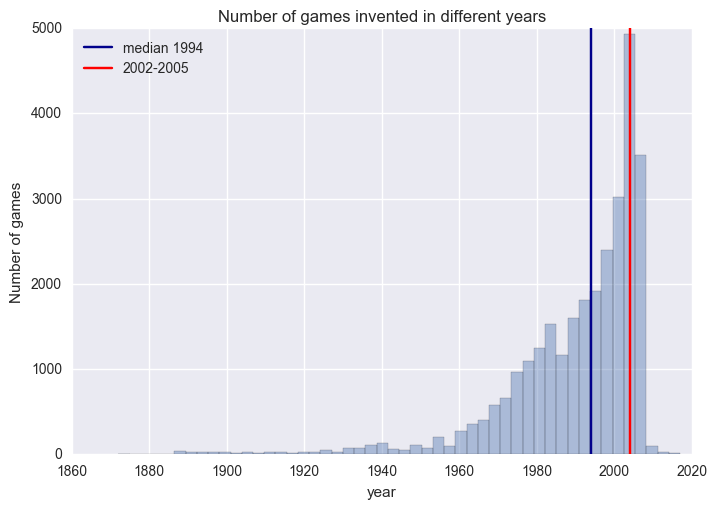

In [5]:
sns.distplot(bgg.year[bgg.year>1870],kde=False)
plt.plot([bgg.year.median()]*1000, np.linspace(0,5000,1000), 'darkblue', label = 'median 1994')
plt.plot([2004]*1000, np.linspace(0,5000,1000), 'red', label = '2002-2005')
plt.title('Number of games invented in different years')
plt.ylabel('Number of games')
plt.xlabel('year')
plt.legend(loc = 'best')
# plt.savefig('game_year.png')
plt.show()

Above is a graph showing the distribution of year a game of invented. Most of the game was publised after 1994. The number of games publised each year is generally increasing. In the about 2002 to 2005, the number of games released reached a peak, with about 5000 new board games! 

I am not sure if this is a coincidence with the early 2000s depression. Has economic slump hit the publishers or actually the otherway around? A very trivial answer I can draw from this graph is that the drop in economics may have actually helped board game market. Might because of that people may not willing to spend money on more expensive relaxing activities, such as movies. But they would be happy for a one-time purchase on a fun board game. 

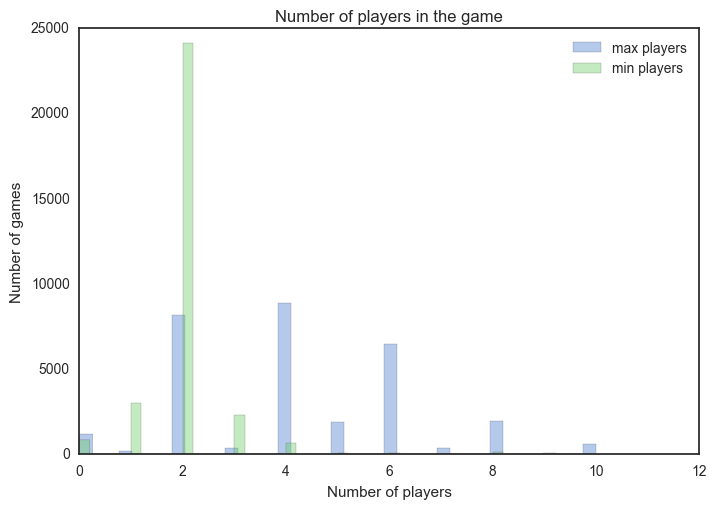

In [6]:
sns.set(style="white", palette="muted", color_codes=True)
sns.distplot(bgg.max_players[bgg.max_players <= 10], label = 'max players',kde=False)
sns.distplot(bgg.min_players[bgg.min_players <= 10], label = 'min players',kde=False)
plt.legend()
plt.ylabel('Number of games')
plt.xlabel('Number of players')
plt.title('Number of players in the game')
plt.show()

Most of games need minimum of two people, the max of players in the game varies.

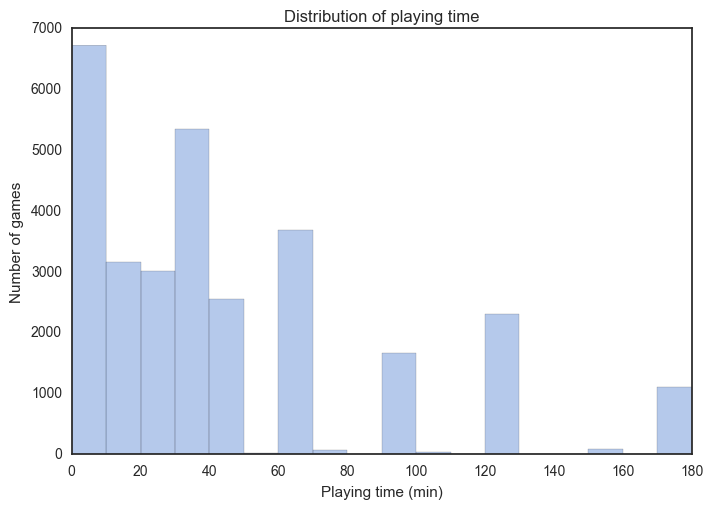

In [7]:
sns.set(style="white", palette="muted", color_codes=True)
_ = sns.distplot(bgg.playing_time[bgg.playing_time<=180],kde=False,bins=range(0,181,10))
plt.title('Distribution of playing time')
plt.ylabel('Number of games')
plt.xlabel('Playing time (min)')
plt.show()

Above is a graph showing the average time playing. Most of games takes less than an hour. Some may take longer time. I only plotted the game takes less than 3 hours, because I personally don't want to spend more than 3 hours on a game. hahah.

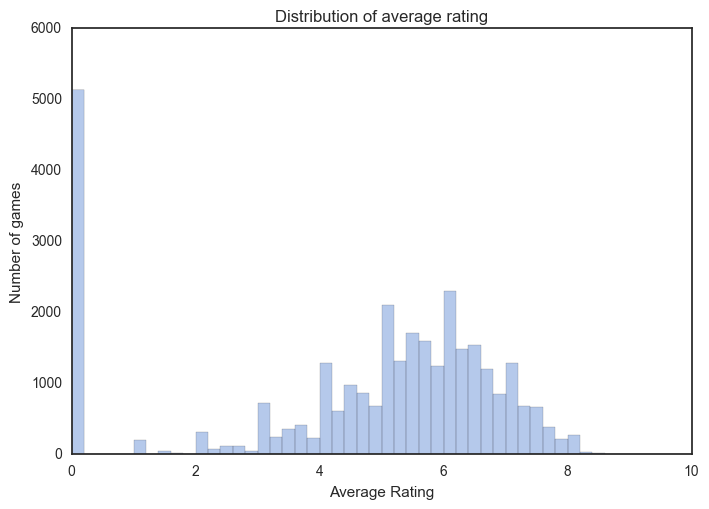

In [8]:
sns.set(style="white", palette="muted", color_codes=True)
_ = sns.distplot(bgg.rating_average,kde=False)
plt.title('Distribution of average rating')
plt.ylabel('Number of games')
plt.xlabel('Average Rating')
plt.show()

This is a figure showing the distribution of average rating. Except the cases of rating equals zero, the ratings are pretty normally distributed. More analysis on the rating will be given later.

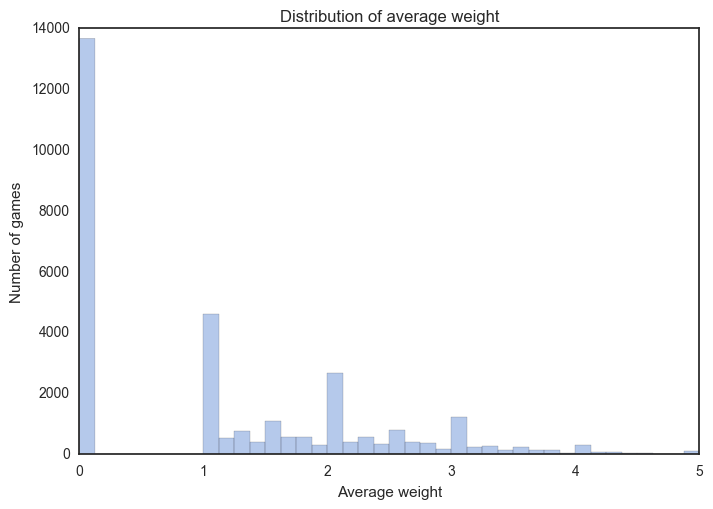

In [9]:
sns.set(style="white", palette="muted", color_codes=True)
_ = sns.distplot(bgg.rating_average_weight,kde=False)
plt.title('Distribution of average weight')
plt.ylabel('Number of games')
plt.xlabel('Average weight')
plt.show()

Generally, as the game becomes harder and more complex, the number of games becomes larger.

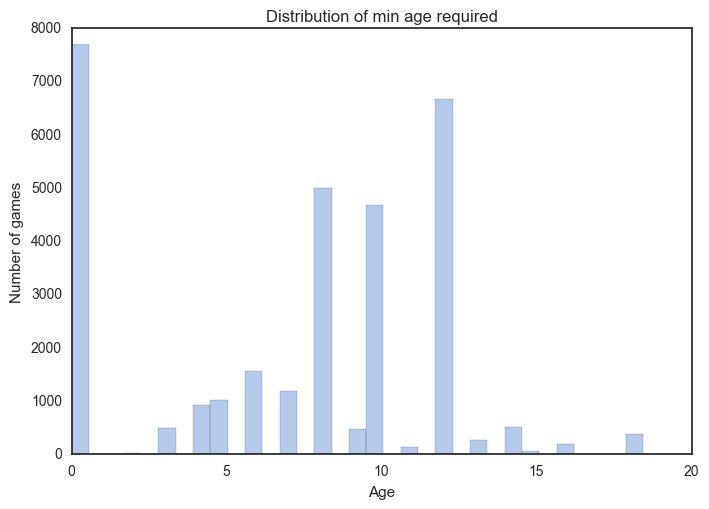

In [10]:
sns.set(style="white", palette="muted", color_codes=True)
_ = sns.distplot(bgg.min_age[bgg.min_age<20],kde=False)
plt.title('Distribution of min age required')
plt.ylabel('Number of games')
plt.xlabel('Age')
plt.show()

/Applications/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


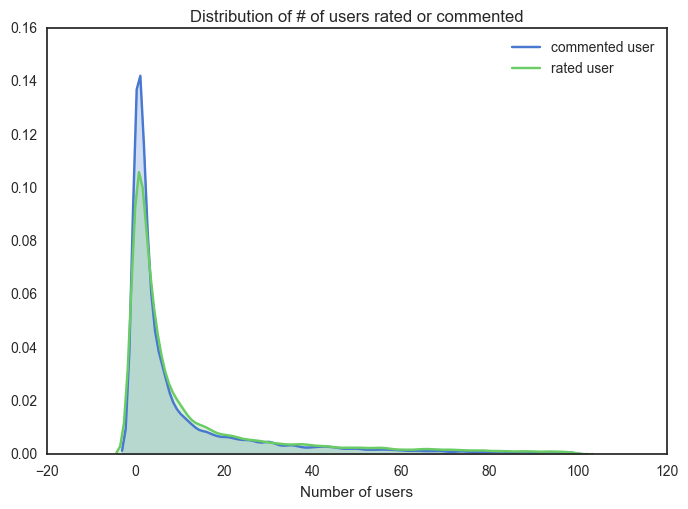

In [11]:
sns.set(style="white", palette="muted", color_codes=True)
sns.distplot(bgg.users_commented[bgg.users_commented < 100],hist=False, kde_kws={"shade": True}, label = 'commented user')
sns.distplot(bgg.users_rated[bgg.users_rated<100],hist=False, kde_kws={"shade": True}, label = 'rated user')
plt.xlabel('Number of users')
plt.title('Distribution of # of users rated or commented')
# plt.savefig('Distribution of # of users rated or commented.png')
plt.show()

This graph shows the ditribution of number of people commented or have rated the game. It can be found that a large portion of the games have comments less than 100. So in the data extraction part, I set the upper limit of comments for each game as 100.

/Applications/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


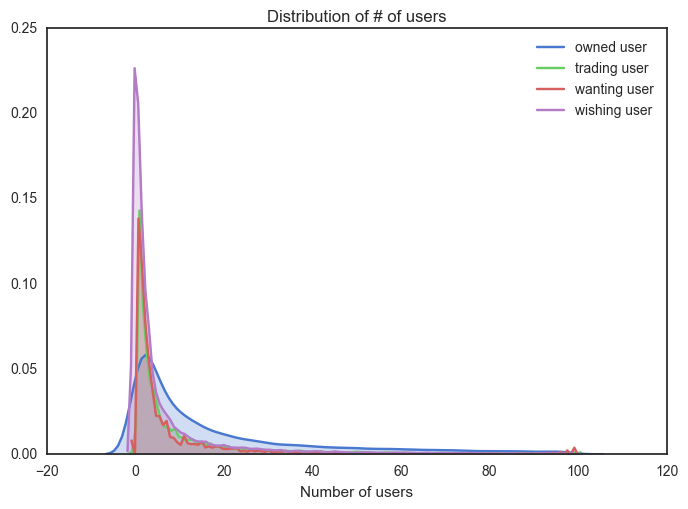

In [12]:
sns.set(style="white", palette="muted", color_codes=True)
# sns.distplot(bgg.users_commented[bgg.users_commented < 100],hist=False, kde_kws={"shade": True}, label = 'commented user')
sns.distplot(bgg.users_owned[bgg.users_owned<100],hist=False, kde_kws={"shade": True}, label = 'owned user')
sns.distplot(bgg.users_trading[bgg.users_trading<100],hist=False, kde_kws={"shade": True}, label = 'trading user')
sns.distplot(bgg.users_wanting[bgg.users_wanting<100],hist=False, kde_kws={"shade": True}, label = 'wanting user')
sns.distplot(bgg.users_wishing[bgg.users_wishing<100],hist=False, kde_kws={"shade": True}, label = 'wishing user')
plt.xlabel('Number of users')
plt.title('Distribution of # of users')
plt.show()

### Factors influencing ratings

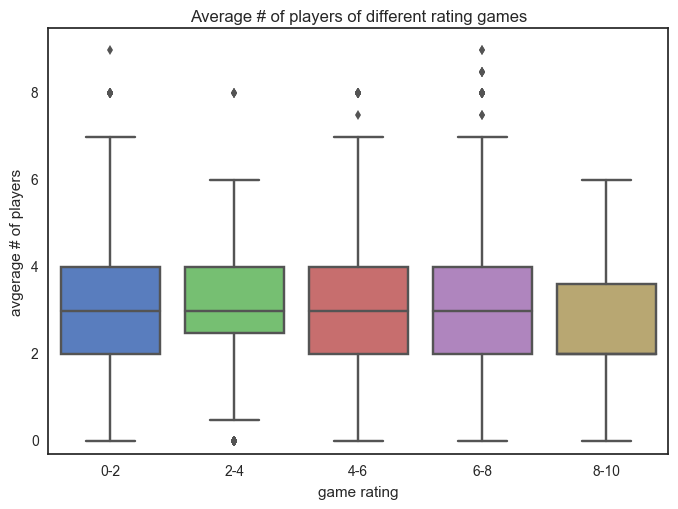

In [13]:
bins = [-1, 2, 4, 6, 8, 10]
bgg['rate_cat'] = pd.cut(bgg.rating_average, bins=bins, labels=bins[1:])
bgg_players = bgg[bgg.max_players < 10]
rate_players = [(bgg_players.max_players[bgg_players['rate_cat'] == i]+bgg_players.min_players[bgg_players['rate_cat'] == i])/2 for i in bins[1:]]
ax = sns.boxplot(data=rate_players)
ax.set(ylim = (-.3,9.5),xlabel='game rating', ylabel='avgerage # of players', title='Average # of players of different rating games', xticklabels=['0-2', '2-4', '4-6', '6-8', '8-10'])
plt.show()

This graph shows how the average number of people in the game affecting the rating. There doesn't seem to be a differnce in the pattern.

## Featured Findings 2 - 
### High rating games are more complex!

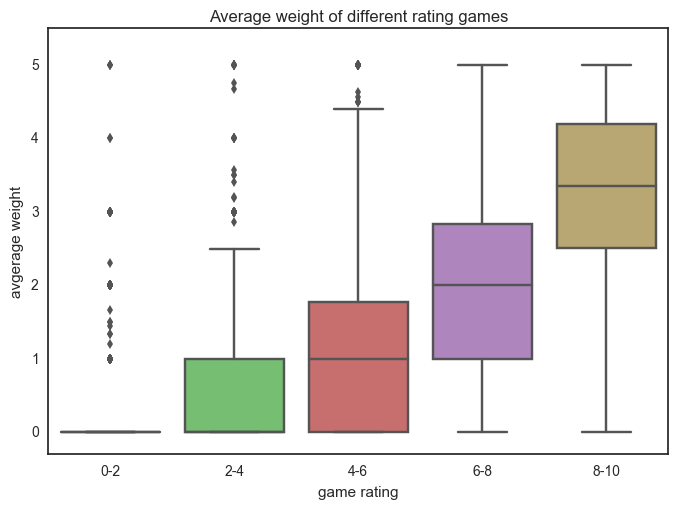

In [14]:
rate_weight = [bgg.rating_average_weight[bgg.rate_cat == i] for i in bins[1:]]
ax = sns.boxplot(data=rate_weight)
ax.set(ylim = (-.3,5.5),xlabel='game rating', ylabel='avgerage weight', title='Average weight of different rating games', xticklabels=['0-2', '2-4', '4-6', '6-8', '8-10'])
# plt.savefig('Average weight of different rating games.png')
plt.show()

This graph shows the complexity distribution of game under differnt rating categories. There is a significant difference in the complexity of the game in different category. The games in the very high rating end are actually much more complex than the rest. In general, the more complex the game is, the higher rating it will get.

However, the range of the complexity index of each rating category is actually quite similar. So don't worry there is still some games which is fun and easy at the same time!

## Featured Findings 3 - 
### High rating games generally take longer playing time! And require larger min age!

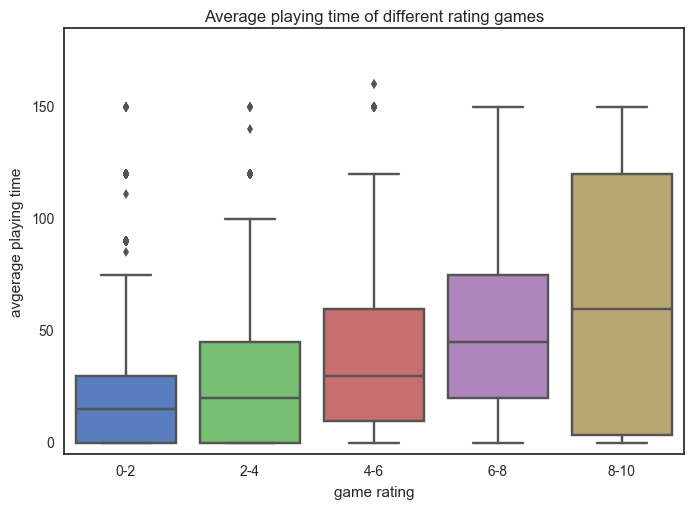

In [15]:
bgg_time = bgg[bgg.playing_time<180]
rate_time = [bgg_time.playing_time[bgg_time.rate_cat == i] for i in bins[1:]]
ax = sns.boxplot(data=rate_time)
ax.set(ylim = (-5,185), xlabel='game rating', ylabel='avgerage playing time', title='Average playing time of different rating games', xticklabels=['0-2', '2-4', '4-6', '6-8', '8-10'])
# plt.savefig('Average playing time of different rating games.png')
plt.show()

Similar to weight vs. rating, in the average playing time under different rating category figure, it shows that the longer the game, the higher the rating in general. I think it might due to the relation between playing time and complexity. Because it usually takes more time for more complex game.

But again, don't worry. The range of time needed are quite large and similar for different category. So if you are looking for a great game, but you don't want to spend a lot time on it, you will still find it!

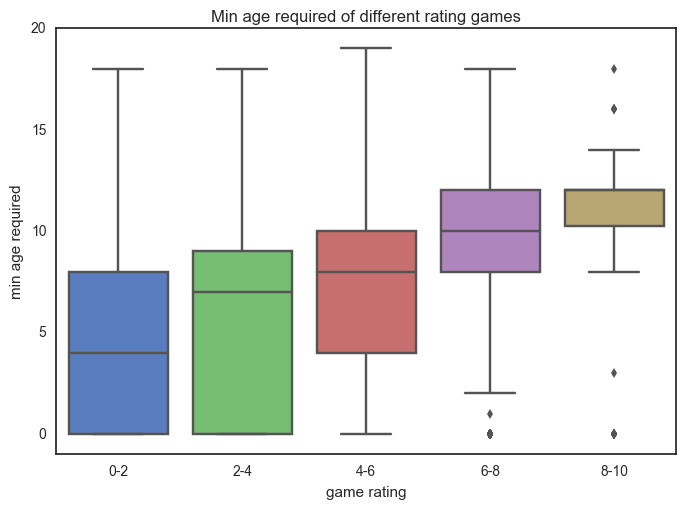

In [16]:
bgg_age = bgg[bgg.min_age<20]
rate_age = [bgg_age.min_age[bgg_age.rate_cat == i] for i in bins[1:]]
ax = sns.boxplot(data=rate_age)
ax.set(ylim = (-1,20),xlabel='game rating', ylabel='min age required', title='Min age required of different rating games', xticklabels=['0-2', '2-4', '4-6', '6-8', '8-10'])
# plt.savefig('Min age required of different rating games.png')
plt.show()

Similarly, in the min age required under different rating category figure, it shows that the higher the rating, the lager the minimum age is required in general. I think it might due to the relation between min age and complexity. Because it requires some knowledge probably for solving complex problem in a game.

But again, don't worry. The range of min age needed are quite large and similar for different category. So if you are looking for a great game for little kid, there are always choices!

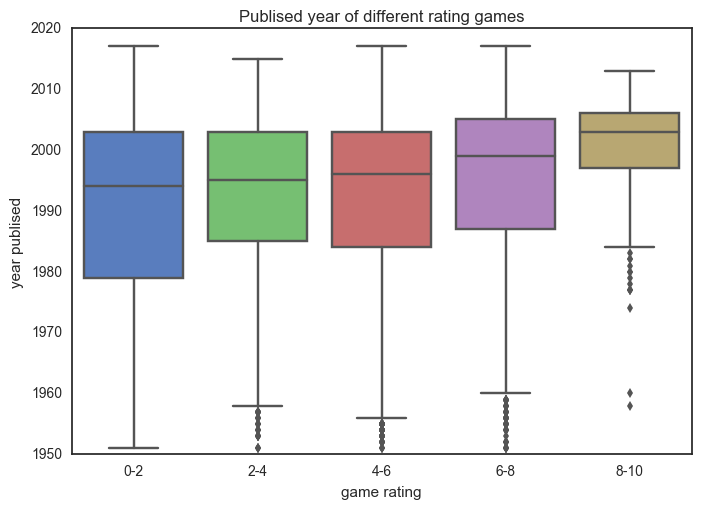

In [17]:
bgg_year = bgg[bgg.year > 1950]
rate_year = [bgg_year.year[bgg_year.rate_cat == i] for i in bins[1:]]
ax = sns.boxplot(data=rate_year)
ax.set(xlabel='game rating', ylabel='year publised', title='Publised year of different rating games', xticklabels=['0-2', '2-4', '4-6', '6-8', '8-10'])
plt.show()

Slight difference can be seen accross different rating levels. But the difference is not significant. The general trend is the game came out after 2000 tends to be better. This is good to know! Those designers are making great things!

I then made this corraltion matrix to verify my assumption on the relation among weight, min age, and ratings, see below. 

Weight is highly correlated to rating. Weight is also quite related to age as I expected. Weight is related to playing time but not much. Suprisingly, year is also related to age, weight and ratings.

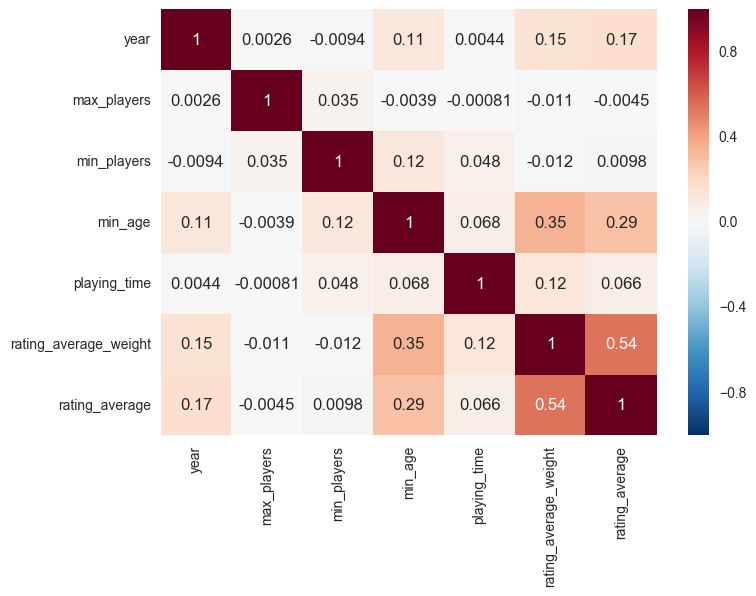

In [18]:
sns.set()
cols = ['year','max_players', 'min_players', 'min_age', 'playing_time', 'rating_average_weight','rating_average',]
corr = bgg[cols].corr()
sns.set(font_scale=1)
sns.heatmap(corr, cbar=True, annot=True, yticklabels=cols, xticklabels=cols)
plt.show()

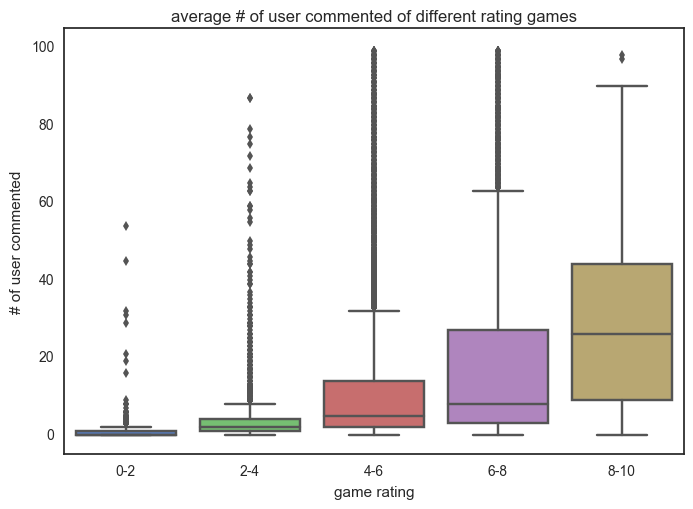

In [19]:
bgg_user_commented = bgg[bgg.users_commented < 100]
rate_year = [bgg_user_commented.users_commented [bgg_user_commented.rate_cat == i] for i in bins[1:]]
sns.set(style="white", palette="muted", color_codes=True)
ax = sns.boxplot(data=rate_year)
ax.set(ylim = (-5,105),xlabel='game rating', ylabel='# of user commented', title='average # of user commented of different rating games', xticklabels=['0-2', '2-4', '4-6', '6-8', '8-10'])
plt.show()

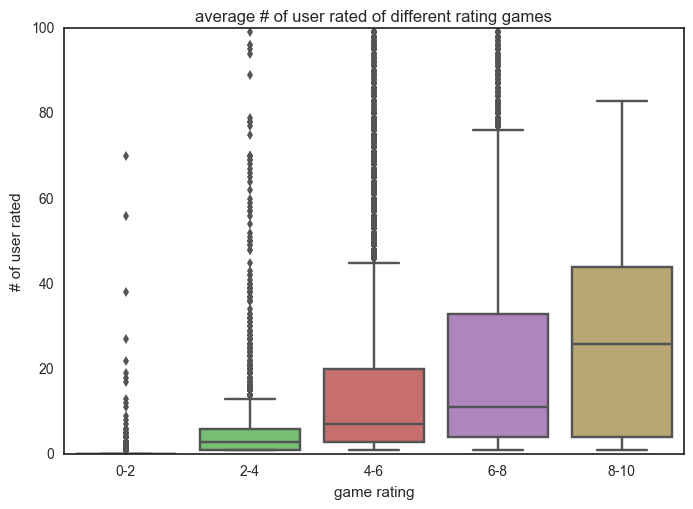

In [20]:
bgg_user_rated = bgg[bgg.users_rated < 100]
rate_year = [bgg_user_rated.users_rated [bgg_user_rated.rate_cat == i] for i in bins[1:]]
sns.set(style="white", palette="muted", color_codes=True)
ax = sns.boxplot(data=rate_year)
ax.set(xlabel='game rating', ylabel='# of user rated', title='average # of user rated of different rating games', xticklabels=['0-2', '2-4', '4-6', '6-8', '8-10'])
plt.show()

Above is analysis of numberical fetures and ratings
***
Below is analysis of category & mechanics

## Featured Findings 4 - 
### Design more WARGAME! It is the category with both large number of games available and high average ratings!

In [21]:
def clean_categories(x):
    result = x.split('|')
    result = [i.strip() for i in result]
    return result

catog = {}
for row in bgg[['id','categories']].iterrows():
    try:
        catog[row[1].id] = clean_categories(row[1].categories)
    except AttributeError:
        catog[row[1].id] = []

catog_list = []
for val in catog.values():
    for i in val:
        if i not in catog_list:
            catog_list = catog_list + [i] 

catog_dict = {}            
for i in catog_list:
    for key,val in catog.items():
        if i in val:
            try:
                catog_dict[i].append(key)
            except KeyError:
                catog_dict[i] = [key]

catog_num = {}
for key, val in catog_dict.items():
    catog_num[key] = len(val)

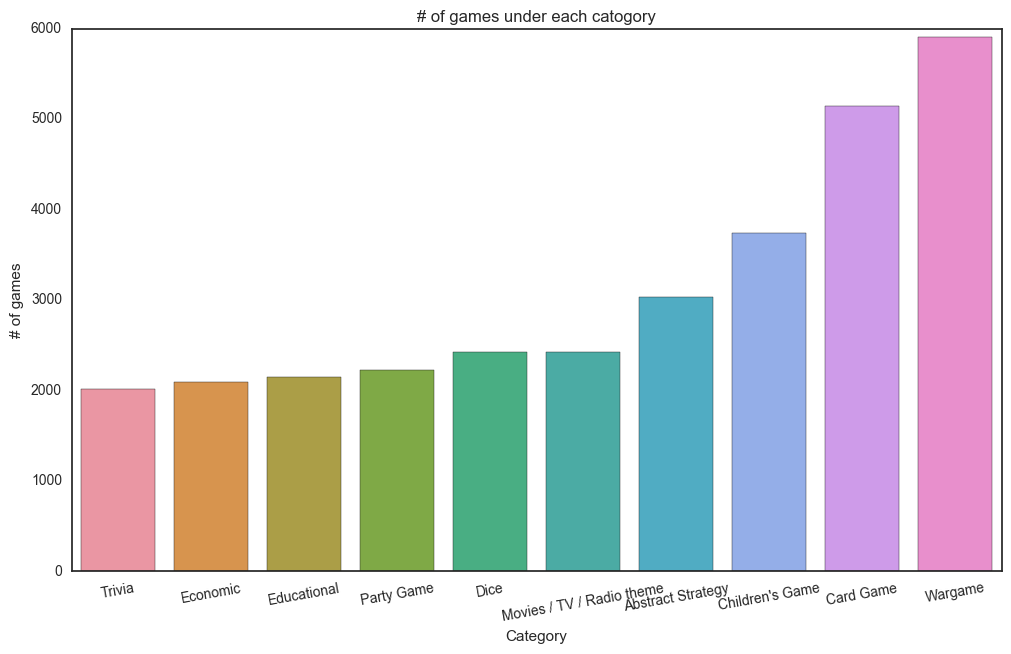

In [22]:
df = pd.DataFrame({'Category':list(catog_num.keys()), 'num_of_games':list(catog_num.values())})
df = df[df.num_of_games > 2000]
df = df.sort_values(by='num_of_games')
sns.set(style="white", palette="muted", color_codes=True)
plt.figure(figsize = (12,7))
ax = sns.barplot(x = df.Category , y = df.num_of_games)
ax.set(ylabel = '# of games', title='# of games under each catogory')
plt.xticks(rotation=10)
# plt.savefig('# of games under each catogory.png')
plt.show()

This graph shows the categories which have the most number of games. The top three are **Wargame**, **Card Game**, **Children's Game**. Now it is reasonable to see if the games under these categories are also higher rated than the rest or not.

In [23]:
pop_category = list(df.Category.values) # a list of categories with top # of games

In [24]:
catog_rating = {}
for key, val in catog_dict.items():  
    a = np.nanmean([bgg.rating_average[bgg.id == i].values for i in val])
    catog_rating[key] = a

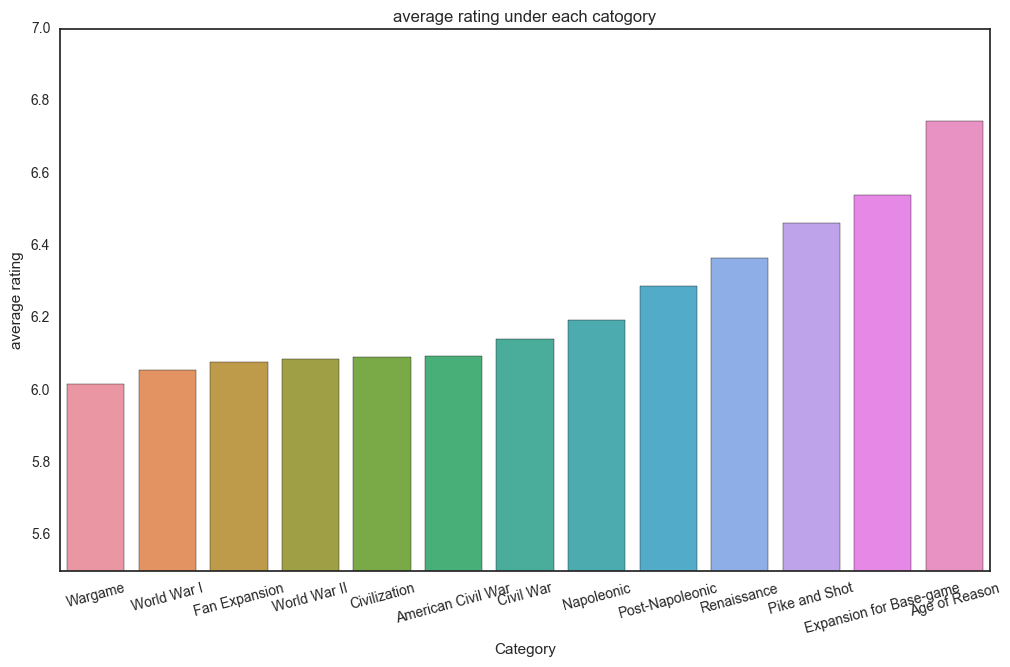

In [25]:
df = pd.DataFrame({'Category':list(catog_rating.keys()), 'average_rating':list(catog_rating.values())})
df = df.sort_values(by='average_rating')
df = df[df.average_rating > 6]
sns.set(style="white", palette="muted", color_codes=True)
plt.figure(figsize = (12,7))
ax = sns.barplot(x = df.Category , y = df.average_rating)
ax.set(ylim = (5.5,7),ylabel = 'average rating', title='average rating under each catogory')
plt.xticks(rotation=15)
# plt.savefig('average rating under each catogory.png')
plt.show()

In [26]:
good_category = list(df.Category.values)
set(good_category).intersection(pop_category)

{'Wargame'}

So only **Wargame** have large amount of available games as well as good ratings. 

In [27]:
catog_weight = {}
for key, val in catog_dict.items():  
    a = np.nanmean([bgg.rating_average_weight[bgg.id == i].values for i in val])
    catog_weight[key] = a
    
df = pd.DataFrame({'Category':list(catog_weight.keys()), 'average_weight':list(catog_weight.values())})
df = df.sort_values(by='average_weight')

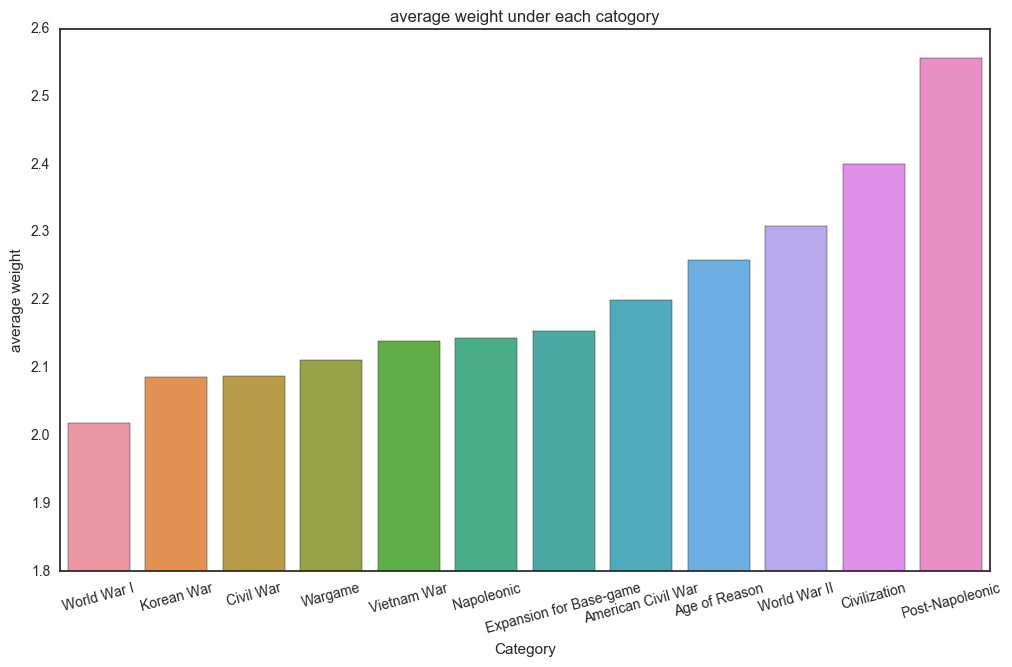

In [28]:
df = df[df.average_weight>2]
sns.set(style="white", palette="muted", color_codes=True)
plt.figure(figsize = (12,7))
ax = sns.barplot(x = df.Category , y = df.average_weight)
ax.set(ylim = (1.8,2.6),ylabel = 'average weight', title='average weight under each catogory')
plt.xticks(rotation=15)
# plt.savefig('average weight under each catogory.png')
plt.show()

This graph shows the categories with very high average weight. It can be found that most of them are **war** related games. Not surprisingly, we can find **Wargame** here again.

## Featured Findings 5 - 
### Top five mechanics are 'Dice Rolling', 'Hand Management', 'Hex-and-Counter', 'Simulation', 'Tile Placement'. Design more!

In [29]:
def clean_categories(x):
    result = x.split('|')
    result = [i.strip() for i in result]
    return result

mec = {}
for row in bgg[['id','mechanics']].iterrows():
    try:
        mec[row[1].id] = clean_categories(row[1].mechanics)
    except AttributeError:
        mec[row[1].id] = []

mec_list = []
for val in mec.values():
    for i in val:
        if i not in mec_list:
            mec_list = mec_list + [i] 

mec_dict = {}            
for i in mec_list:
    for key,val in mec.items():
        if i in val:
            try:
                mec_dict[i].append(key)
            except KeyError:
                mec_dict[i] = [key]

mec_num = {}
for key, val in mec_dict.items():
    mec_num[key] = len(val)

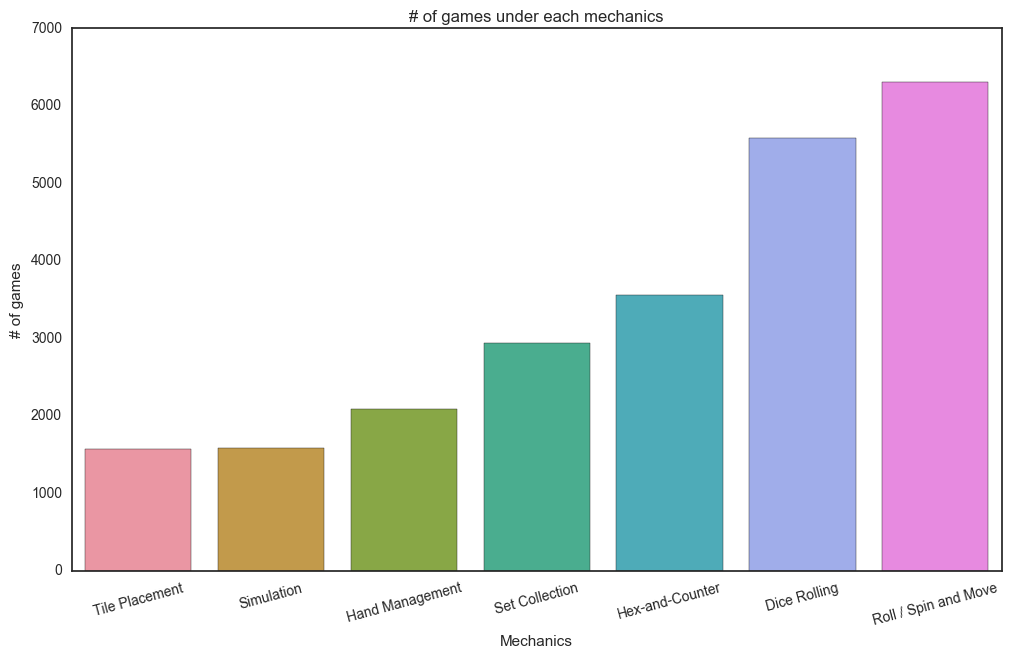

In [30]:
df = pd.DataFrame({'Mechanics':list(mec_num.keys()), 'num_of_games':list(mec_num.values())})
df = df.sort_values(by='num_of_games')
df = df[df.num_of_games > 1500]
sns.set(style="white", palette="muted", color_codes=True)
plt.figure(figsize = (12,7))
ax = sns.barplot(x = df.Mechanics , y = df.num_of_games)
ax.set(ylabel = '# of games', title='# of games under each mechanics')
plt.xticks(rotation=15)
# plt.savefig('# of games under each mechanics.png')
plt.show()

This graph above shows the mechanics with the most number of games. Let's then see if these are fun mechanics or not.

In [31]:
pop_mec = list(df.Mechanics.values)

In [32]:
mec_rating = {}
for key, val in mec_dict.items():  
    a = np.nanmean([bgg.rating_average[bgg.id == i].values for i in val])
    mec_rating[key] = a

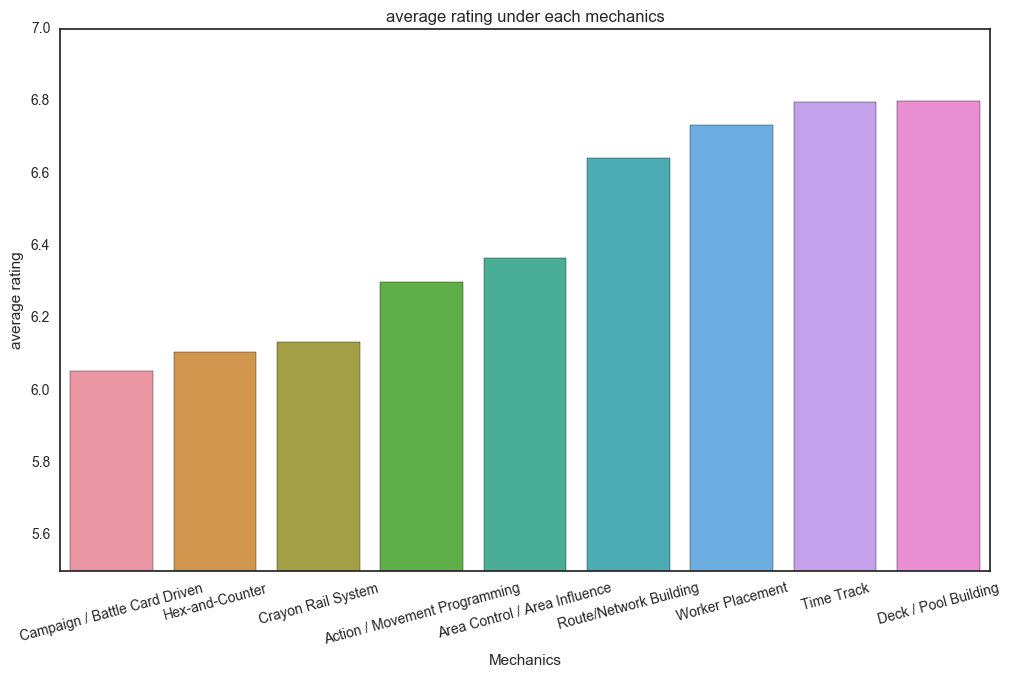

In [33]:
df = pd.DataFrame({'Mechanics':list(mec_rating.keys()), 'average_rating':list(mec_rating.values())})
df = df.sort_values(by='average_rating')
good_mec = list(df[df.average_rating > 5].Mechanics.values)
df = df[df.average_rating > 6]
sns.set(style="white", palette="muted", color_codes=True)
plt.figure(figsize = (12,7))
ax = sns.barplot(x = df.Mechanics , y = df.average_rating)
ax.set(ylim =(5.5,7) ,ylabel = 'average rating', title='average rating under each mechanics')
plt.xticks(rotation=15)
# plt.savefig('average rating under each mechanics.png')
plt.show()

In [34]:
set(good_mec).intersection(pop_mec)

{'Dice Rolling',
 'Hand Management',
 'Hex-and-Counter',
 'Simulation',
 'Tile Placement'}

So these are actually game mechanics that are both fun and have large amount of games using this mechanics. We should play this kind of game more!

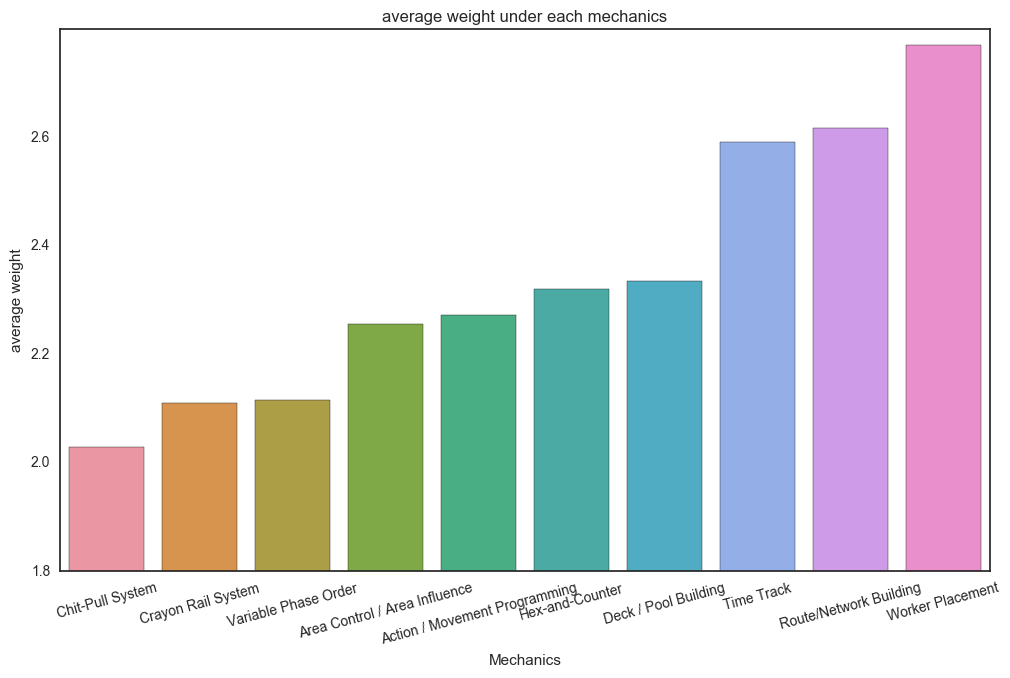

In [35]:
mec_weight = {}
for key, val in mec_dict.items():  
    a = np.nanmean([bgg.rating_average_weight[bgg.id == i].values for i in val])
    mec_weight[key] = a    
df = pd.DataFrame({'Mechanics':list(mec_weight.keys()), 'average_weight':list(mec_weight.values())})
df = df.sort_values(by='average_weight')
df = df[df.average_weight > 2]
sns.set(style="white", palette="muted", color_codes=True)
plt.figure(figsize = (12,7))
ax = sns.barplot(x = df.Mechanics , y = df.average_weight)
ax.set(ylim = (1.8,2.8),ylabel = 'average weight', title='average weight under each mechanics')
plt.xticks(rotation=15)
# plt.savefig('average rating under each mechanics.png')
plt.show()

These are quite different from the list of popular mechanics or fun mechanics.

Above is qualitative analysis of fetures and ratings
***
## Model for Prediction Part
In below I will try to build a model to predict the rating based on these features.

Both kNN and linear regression are used here.

__Linear Model__

In [93]:
data = bgg[['max_players', 'min_age', 'min_players',
       'playing_time', 'rating_average_weight', 'rating_num_weights', 'rating_stddev', 'users_commented', 'users_owned',
       'users_rated', 'users_trading', 'users_wanting', 'users_wishing']]
X = np.array(data)
y = np.array(bgg[['rating_average']])

In [39]:
def loo_risk(X,y,regmod):
    """
    Construct the leave-one-out square error risk for a regression model
    
    Input: design matrix, X, response vector, y, a regression model, regmod
    Output: scalar LOO risk
    """
    loo = LeaveOneOut()
    loo_losses = []
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        regmod.fit(X_train,y_train)
        y_hat = regmod.predict(X_test)
        loss = np.sum((y_hat - y_test)**2)
        loo_losses.append(loss)
    return np.mean(loo_losses)

def emp_risk(X,y,regmod):
    """
    Return the empirical risk for square error loss
    
    Input: design matrix, X, response vector, y, a regression model, regmod
    Output: scalar empirical risk
    """
    regmod.fit(X,y)
    y_hat = regmod.predict(X)
    return np.mean((y_hat - y)**2)

In [40]:
lin1 = linear_model.LinearRegression(fit_intercept=True)
print('LOO Risk: '+ str(loo_risk(X,y,lin1)))
print('Emp Risk: ' + str(emp_risk(X,y,lin1)))

LOO Risk: 3.23971788754
Emp Risk: 3.22908957176


In consideration that there are might some variables are less important comparing with other predictors, a forward selection procedure is used here to see if we can reduce the dimension of the predicting variables.

In [41]:
def forward_step(index_ini, index_total):
    """
    This function does one step of forward stepwise regression
    
    Input: index_ini - a list the variable index from the previous step
           index_total - a list of the index of all the variables
    
    Output: new_var - a integer which indicates the index of the new variable to be added into the model
            np.min(emprisk) - the corresponding empirical risk of the new model
            loorisk - the corresponding leave-one-out risk of the new model
    """
    
    # what are the remaining variables to be added into the model
    index_remain = [x for x in index_total if x not in index_ini]
    
    # a list containing the empirical risk for all the models tested in this step
    emprisk = []
    
    for i in range(len(index_remain)):
        var_index = index_ini + [index_remain[i]]
        x = X[:,var_index]
        emprisk = emprisk + [emp_risk(x,y, lin1)]
    
    new_var = index_remain[np.argmin(emprisk)]
    loorisk = loo_risk(X[:,index_ini+[new_var]],y,lin1)
    return new_var, np.min(emprisk), loorisk

In [42]:
var_list = []
emp_list = [emp_risk(np.ones((X.shape[0], 1)),y, lin1)]
loo_list = [loo_risk(np.ones((X.shape[0], 1)),y, lin1)]
for i in range(X.shape[1]):
    print(i)
    var, emprisk, loorisk = forward_step(var_list,range(X.shape[1]))
    var_list = var_list + [var]
    emp_list = emp_list + [emprisk]
    loo_list = loo_list + [loorisk]

0
1
2
3
4
5
6
7
8
9
10
11
12


In [43]:
name_list = ['None']+list(data.columns[var_list])
pd.DataFrame({'Variable Added':name_list,
             'Emp Risk':emp_list,
             'LOO Risk':loo_list})

,Emp Risk,LOO Risk,Variable Added
0,5.686677,5.687040,None
1,3.915473,3.916143,rating_stddev
2,3.303386,3.304053,rating_average_weight
3,3.272613,3.273521,users_wanting
4,3.245438,3.246597,min_age
5,3.239380,3.240746,users_wishing
6,3.232470,3.233899,users_owned
7,3.229802,3.231311,users_rated
8,3.229487,3.231079,users_commented
9,3.229143,3.230876,users_trading


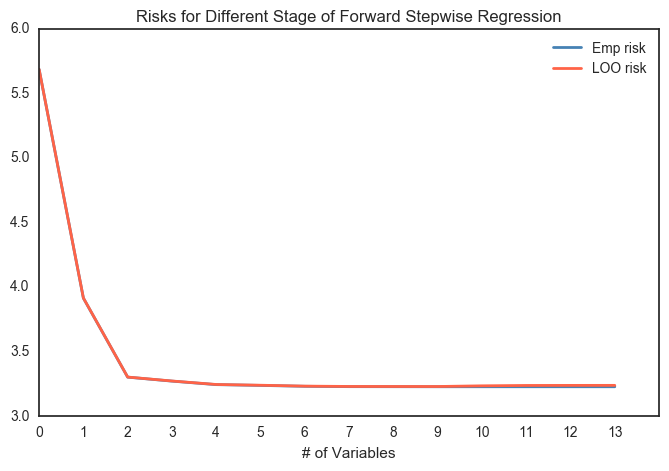

In [44]:
plt.figure(figsize = (8,5))
plt.plot(range(X.shape[1]+1),emp_list,'steelblue',label="Emp risk",linewidth=2)
plt.title("Risks for Different Stage of Forward Stepwise Regression")
plt.plot(range(X.shape[1]+1),loo_list,'tomato',label="LOO risk", linewidth=2)
plt.legend(loc = 'best')
plt.xticks(list(range(X.shape[1]+1)))
_ = plt.xlabel('# of Variables')
plt.show()

The elbow in this graph is about "# of variables" equals to four. So the first four variables (rating_stddev, rating_average_weight, users_wanting, min_age) will be chosen in the latter model comparison.

__kNN__

Here I first only selected the numerical features of a game, and then try to use kNN algorithm to generate a model for the prediction of rating. 

Once the model is generated, the Leave-one-out square error risk and emperical risk are calculated for different choice of nearest neighbor. They are compared with each other to see which k gives the best prediction, and they are also compared with the risk from linear regression.

Then finally the best model came to be predicting rating based on __13-nearest neighbor__.

In [94]:
# my mac is not capable for calculation of this very large dataset. 
# So I randomly chose 2000 rows from the dataset
# when allowed, the model should be chosen based on the entire dataset.
index = np.random.choice(2000, 2000, replace=False)
X = np.array(data.loc[index,:])
y = y[index,:]

In [95]:
LOOs = []
MSEs = []
Ks = list(range(5,21))+list(range(25,51,5))
for k in Ks:
    print(k, end ="...")
    knn = neighbors.KNeighborsRegressor(n_neighbors=k)
    LOOs.append(loo_risk(X,y,knn))
    MSEs.append(emp_risk(X,y,knn))

5...6...7...8...9...10...11...12...13...14...15...16...17...18...19...20...25...30...35...40...45...50...

In [97]:
lin1 = linear_model.LinearRegression(fit_intercept=True)
X = np.array(data.loc[index,['rating_stddev','rating_average_weight', 'min_age','users_wanting']])
loo_risk_lr = loo_risk(X,y,lin1)
emp_risk_lr = emp_risk(X,y,lin1)
print('LOO Risk: '+ str(loo_risk_lr))
print('Emp Risk: ' + str(emp_risk_lr))

LOO Risk: 0.707126756402
Emp Risk: 0.697475058521


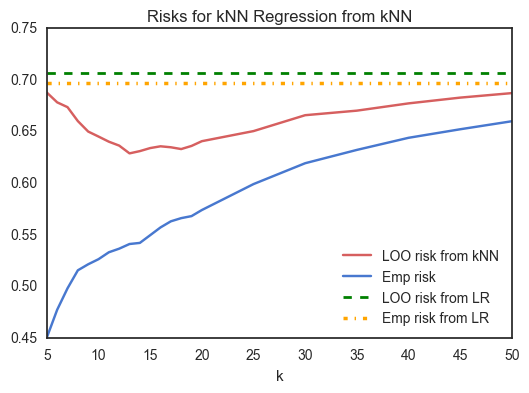

In [98]:
plt.figure(figsize=(6,4))
plt.plot(Ks,LOOs,'r',label="LOO risk from kNN")
plt.title("Risks for kNN Regression from kNN")
plt.plot(Ks,MSEs,'b',label="Emp risk")
plt.axhline(y = loo_risk_lr,linestyle = '--', linewidth=2, color='green', label="LOO risk from LR")
plt.axhline(y = emp_risk_lr,linestyle = '-.', linewidth=2.5, color='orange', label="Emp risk from LR")
plt.legend(loc='best')
_ = plt.xlabel('k')
plt.show()

In [100]:
# pd.DataFrame({'k':Ks,'LOO':LOOs})

The LOO risk reaches the loweset with the choice of $k = 13$. The result has been compared with the best model from linear regression by using same subset of data. It can be found that the __kNN__ model is better.

More models will be compared!